In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [46]:
file = "bass.wav"
samplerate, data =  wavfile.read(file)
duration = len(data) / samplerate
timeaxis = np.arange(0, duration, 1/samplerate)
print("Samplerate = {}, Autio Shape: {}\nDuration: {}; Time: {}".format(samplerate, np.shape(data), duration, timeaxis))


Samplerate = 44100, Autio Shape: (18684, 2)
Duration: 0.4236734693877551; Time: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.23605442e-01
 4.23628118e-01 4.23650794e-01]


/var/folders/tk/xc0j_h3j0ld05pwyt5kbj6_80000gp/T/ipykernel_52581/4276883766.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data =  wavfile.read(file)


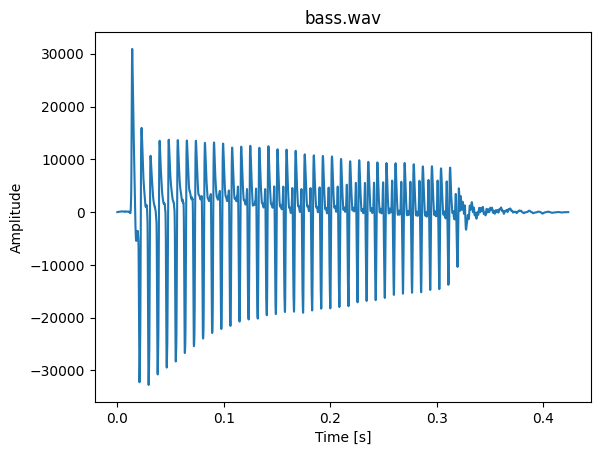

In [47]:
plt.plot(timeaxis, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(file)
plt.show()

In [48]:
# слушаем, что получилось
sd.play(data[:, 0], samplerate)
sd.wait()

STEREO TO MONO

Sampling Rate: 44100
Audio Shape: (18684,)


/var/folders/tk/xc0j_h3j0ld05pwyt5kbj6_80000gp/T/ipykernel_52581/3102342277.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


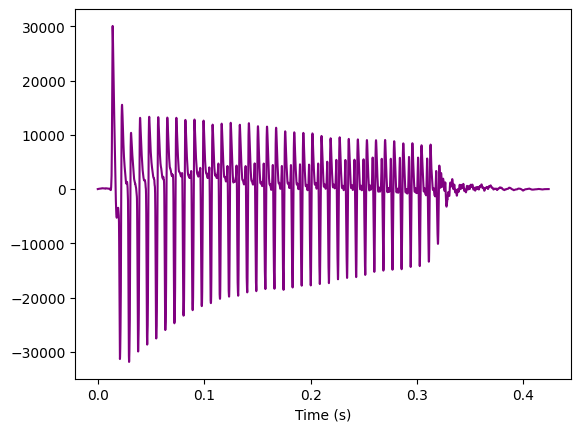

In [49]:
asegment = AudioSegment.from_wav(file)
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")

print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()


СПЕКТОГРАММА

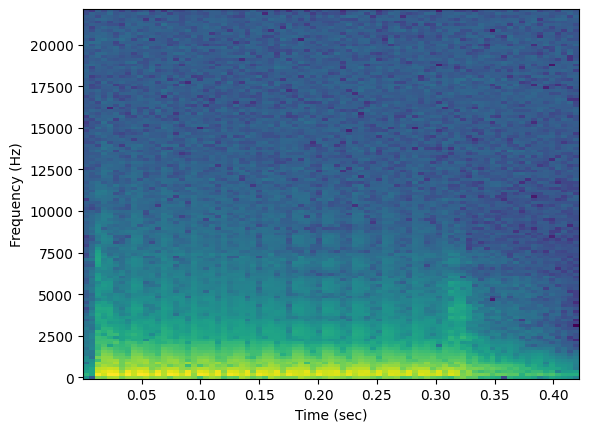

In [50]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

БЫСТРОЕ ПРЕОБРАЗОВАНИЕ ФУРЬЕ

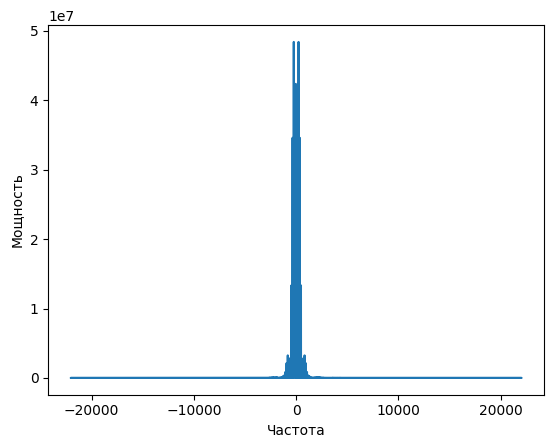

In [51]:
from scipy.fft import fft, fftfreq
# число точек в normalized_tone
N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

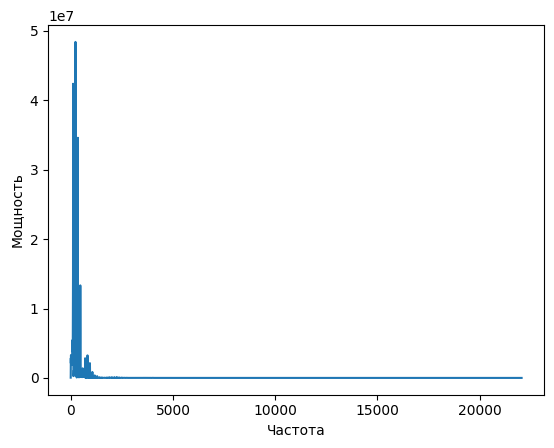

In [52]:
from scipy.fft import rfft, rfftfreq
# число точек в normalized_tone
rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

ФИЛЬТРАЦИЯ ЧАСТОТЫ

In [53]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)
# Наша целевая частота
target_idx = int(points_per_freq * 350)

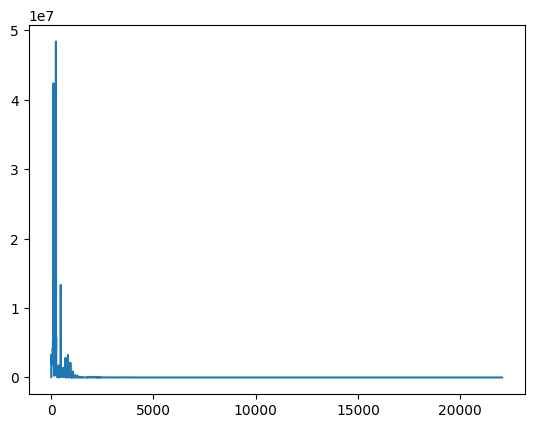

In [54]:
ryf[target_idx-10:target_idx+10] = 0
plt.plot(rxf, np.abs(ryf))
plt.show()

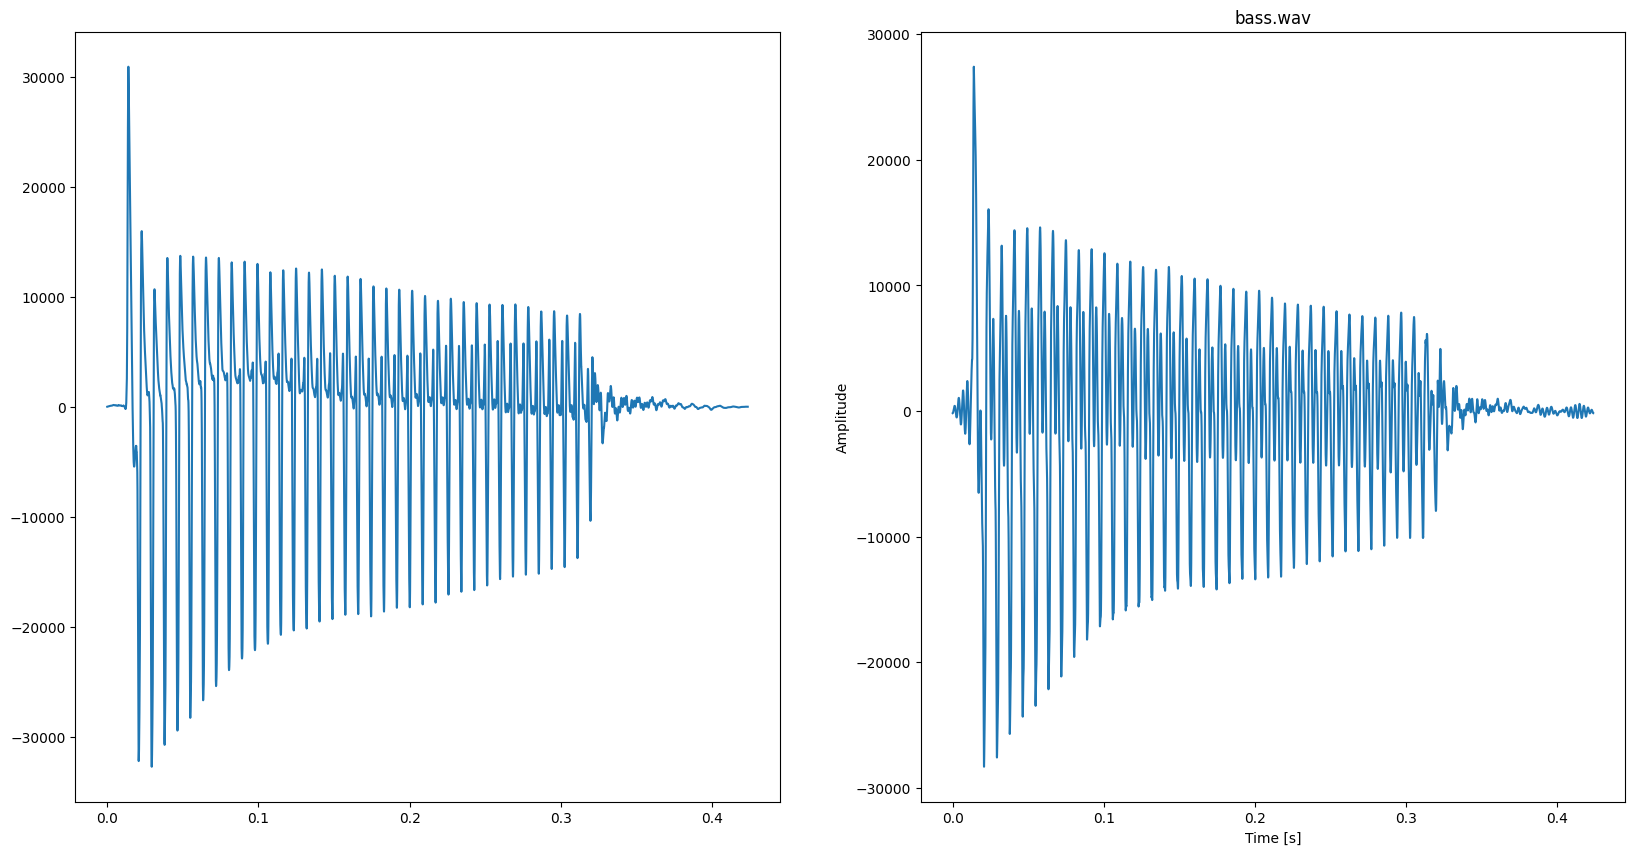

In [55]:
from scipy.fft import irfft
new_sig = irfft(ryf)
fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )
ax[0].plot(time, data[:, 0])
ax[1].plot(time, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(file)
plt.show()


In [59]:
# слушаем, что получилось
sd.play(data[:, 0], samplerate)
sd.wait()

sd.play(new_sig, samplerate)
sd.wait()